In [1]:
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# تعديل مسار الدرايفر
chromedriver_path = r"C:\Users\96655\Desktop\Web Scraping\chromedriver-win64\chromedriver-win64\chromedriver.exe"

# إعدادات المتصفح
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# إنشاء الدرايفر
service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service, options=options)

# اختبار بسيط
driver.get("https://www.google.com")
print("✅ المتصفح اشتغل، عنوان الصفحة:", driver.title)
driver.quit()

ModuleNotFoundError: No module named 'selenium'

In [ ]:
url = "https://www.fintastico.com/fintech-uk/"

path_to_file = r"C:\Users\96655\Desktop\Web Scraping\\"
chromedriver_path = r"C:\Users\96655\Desktop\Web Scraping\chromedriver-win64\chromedriver.exe"

from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
from bs4 import BeautifulSoup

mode = "" #mode=extract/scrape/""

if mode != "extract":
    driver = webdriver.Chrome()
    driver.maximize_window()

    driver.get(url)

    last_height = 0

    while True:
        driver.execute_script('window.scrollBy(0, 5000)')
        time.sleep(1)

        new_height = driver.execute_script("return document.body.scrollHeight")
        print(str(new_height) + "-" + str(last_height))

        if new_height == last_height:
            break
        else:
            last_height = new_height

    page_source = driver.page_source

    with open(path_to_file + "source.txt", "w", encoding="utf-8") as f:
        f.write(page_source)


if mode != "scrape":
    data = []

    with open(path_to_file + "source.txt", "r", encoding="utf-8") as f:
        page_source = f.read()

    soup = BeautifulSoup(page_source, features="html.parser")

    items = soup.find_all("a", class_="card")

    for item in items:
        item_out = {}
        item_out['Title'] = item.find("h4").text if item.find("h4") else ""
        item_out['Link'] = item.attrs.get('href', '')
        item_out['Description'] = item.find("p").text if item.find("p") else ""

        img_tag = item.find("img")
        if img_tag and img_tag.has_attr("src"):
            item_out['Image'] = img_tag['src']
        else:
            item_out['Image'] = ""

        data.append(item_out)

    df = pd.DataFrame(data)
    df.to_excel(path_to_file + "startups_with_images.xlsx", index=False)
    df.to_csv(path_to_file + "startups_with_images.csv", sep=";", index=False)

1604-0
2441-1604
2487-2441
3324-2487
3370-3324
4207-3370
4253-4207
5091-4253
5137-5091
5974-5137
6020-5974
6857-6020
6903-6857
7740-6903
7786-7740
8623-7786
8669-8623
12652-8669
12698-12652
13977-12698
21414-13977
23231-21414
23277-23231
25093-23277
25139-25093
26955-25139
27001-26955
28818-27001
28864-28818
30680-28864
30726-30680
32543-30726
32589-32543
32589-32589


In [ ]:
import os
import requests
import pandas as pd

# مسار ملف البيانات (لو عندك ملف csv فيه عمود 'Image' يحتوي روابط الصور)
csv_file_path = r"C:\Users\96655\Desktop\Web Scraping\startups_with_images.csv"

# مجلد حفظ الصور
images_folder = r"C:\Users\96655\Desktop\Web Scraping\image"
os.makedirs(images_folder, exist_ok=True)

# قراءة ملف csv
df = pd.read_csv(csv_file_path, sep=";")  # أو استخدم الفاصل المناسب

# لو عمود الصور اسمه 'Image' ويحوي روابط الصور
image_urls = df['Image'].dropna().tolist()

for idx, url in enumerate(image_urls):
    try:
        response = requests.get(url)
        response.raise_for_status()  # للتأكد من نجاح الطلب
        # حفظ الصورة باسم image_1.jpg , image_2.jpg ...
        img_name = f"image_{idx+1}.jpg"
        img_path = os.path.join(images_folder, img_name)
        with open(img_path, "wb") as f:
            f.write(response.content)
        print(f"تم حفظ الصورة: {img_name}")
    except Exception as e:
        print(f"فشل تحميل الصورة من {url} بسبب: {e}")

تم حفظ الصورة: image_1.jpg
تم حفظ الصورة: image_2.jpg
تم حفظ الصورة: image_3.jpg
تم حفظ الصورة: image_4.jpg
تم حفظ الصورة: image_5.jpg
تم حفظ الصورة: image_6.jpg
تم حفظ الصورة: image_7.jpg
تم حفظ الصورة: image_8.jpg
تم حفظ الصورة: image_9.jpg
تم حفظ الصورة: image_10.jpg
تم حفظ الصورة: image_11.jpg
تم حفظ الصورة: image_12.jpg
تم حفظ الصورة: image_13.jpg
تم حفظ الصورة: image_14.jpg
تم حفظ الصورة: image_15.jpg
تم حفظ الصورة: image_16.jpg
تم حفظ الصورة: image_17.jpg
تم حفظ الصورة: image_18.jpg
تم حفظ الصورة: image_19.jpg
تم حفظ الصورة: image_20.jpg
تم حفظ الصورة: image_21.jpg
تم حفظ الصورة: image_22.jpg
تم حفظ الصورة: image_23.jpg
تم حفظ الصورة: image_24.jpg
تم حفظ الصورة: image_25.jpg
تم حفظ الصورة: image_26.jpg
تم حفظ الصورة: image_27.jpg
تم حفظ الصورة: image_28.jpg
تم حفظ الصورة: image_29.jpg
تم حفظ الصورة: image_30.jpg
تم حفظ الصورة: image_31.jpg
تم حفظ الصورة: image_32.jpg
تم حفظ الصورة: image_33.jpg
تم حفظ الصورة: image_34.jpg
تم حفظ الصورة: image_35.jpg
تم حفظ الصورة: image_36.jpg
ت

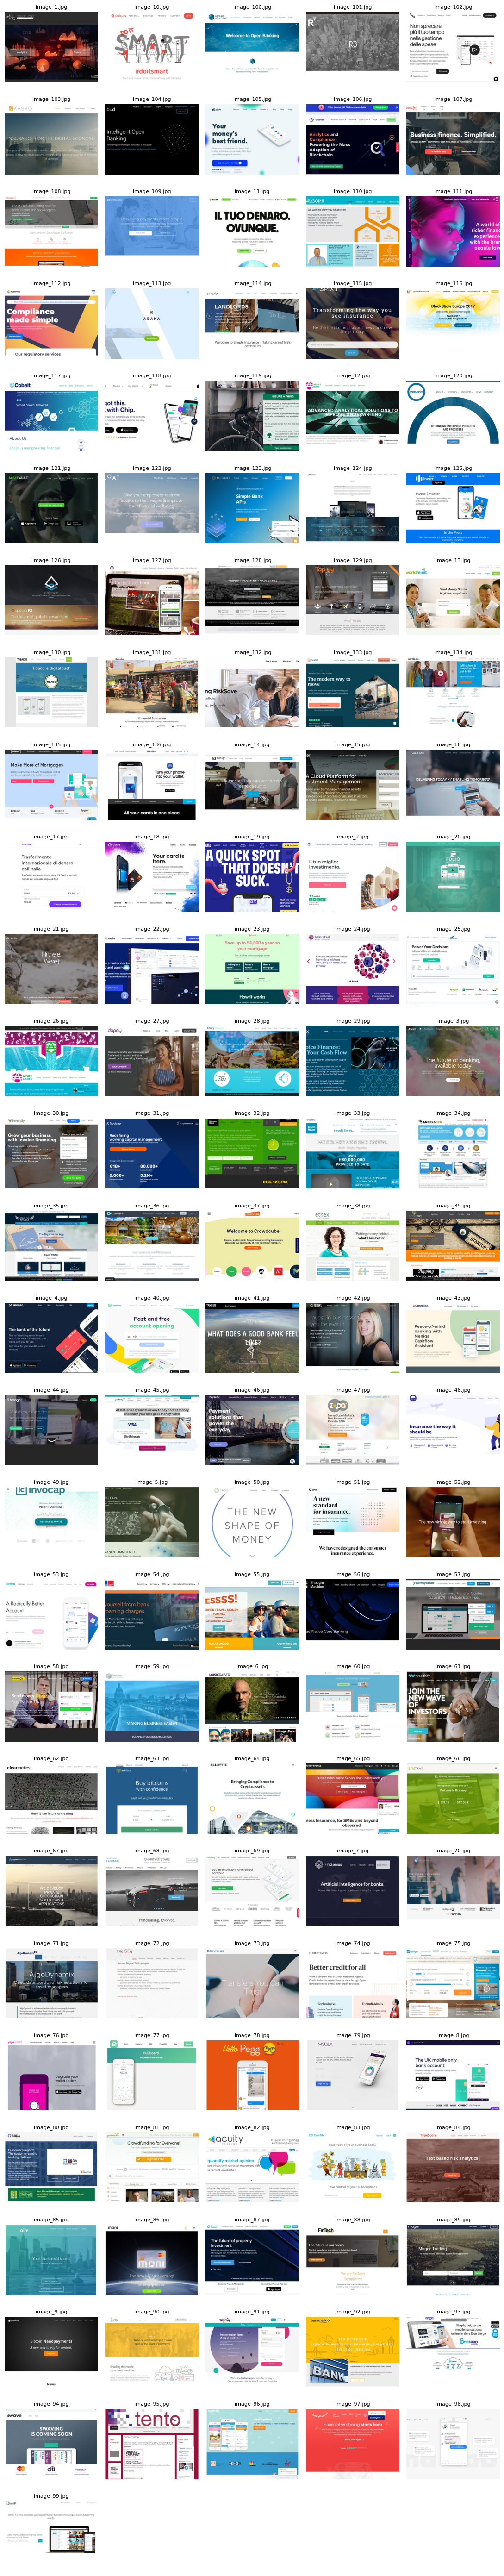

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
# إعدادات
images_folder = r"C:\Users\96655\Desktop\Web Scraping\image"
images_per_page = 136
images_per_row = 5 # 4 صور في كل صف

# جلب أسماء الصور
image_files = sorted(os.listdir(images_folder))

total_images = len(image_files)

# تقسيم الصور إلى مجموعات من 16 صورة
for page_start in range(0, total_images, images_per_page):
    page_files = image_files[page_start:page_start + images_per_page]

    # حساب عدد الصفوف
    rows = (len(page_files) + images_per_row - 1) // images_per_row
    plt.figure(figsize=(11, 2 * rows))

    for i, img_file in enumerate(page_files):
        try:
            img_path = os.path.join(images_folder, img_file)
            img = Image.open(img_path)
            plt.subplot(rows, images_per_row, i + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"{img_file}", fontsize=8)
        except Exception as e:
            print(f"خطأ في عرض الصورة {img_file}: {e}")

    plt.tight_layout()
    plt.show()

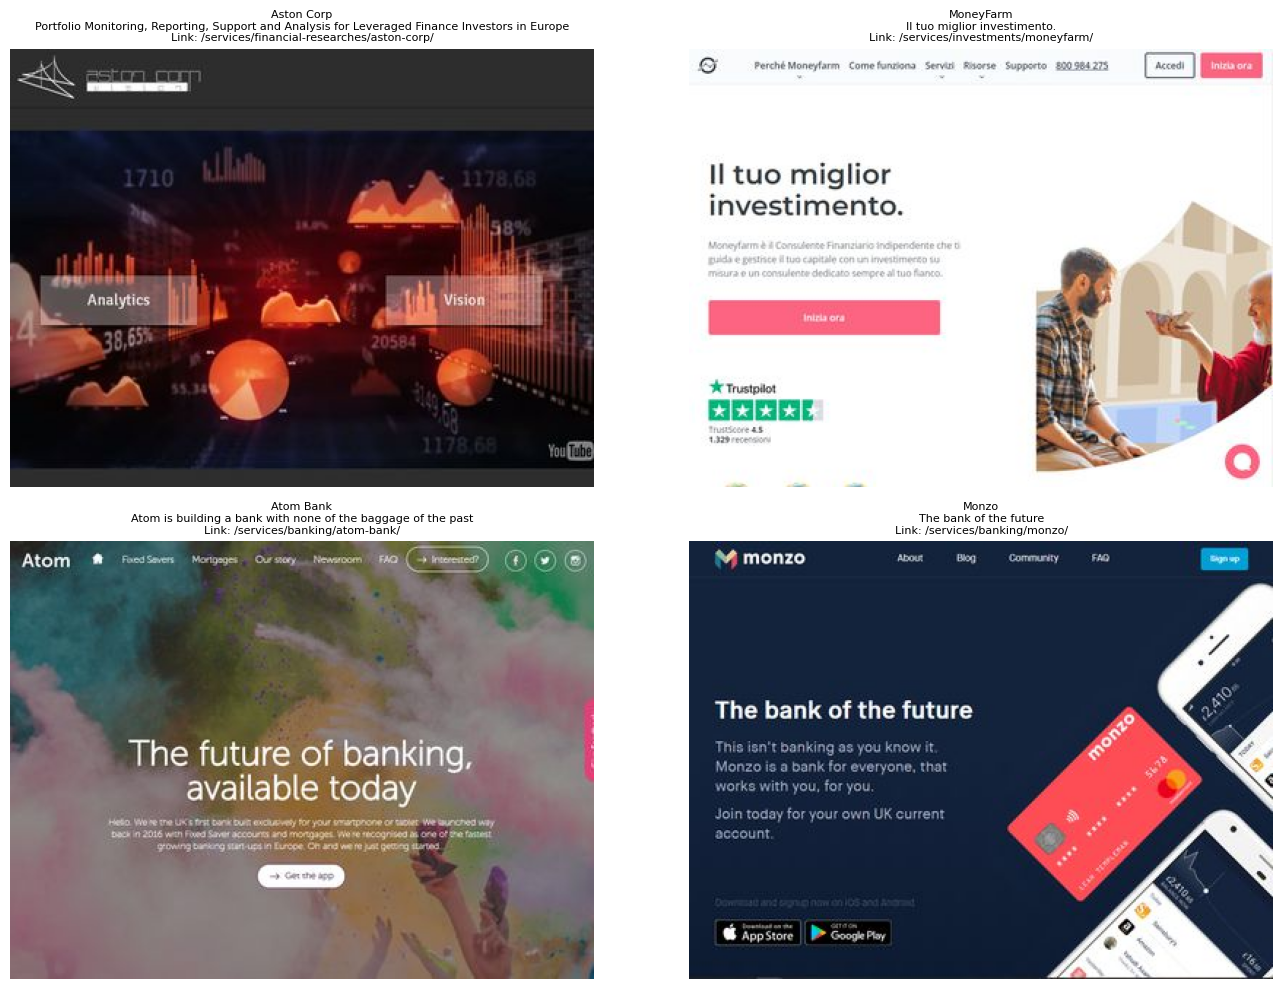

In [ ]:
from io import BytesIO
# قراءة ملف Excel
df = pd.read_excel(r"C:\Users\96655\Desktop\Web Scraping\startups_with_images.xlsx")

# اختيار أول 4 شركات
top_4 = df.head(4)

# عرض الصور والمعلومات
plt.figure(figsize=(14, 10))

for i, row in enumerate(top_4.itertuples(index=False), 1):
    try:
        img_data = requests.get(row.Image).content
        img = Image.open(BytesIO(img_data))

        plt.subplot(2, 2, i)
        plt.imshow(img)
        plt.axis("off")

        plt.title(f"{row.Title}\n{row.Description}\nLink: {row.Link}", fontsize=8)

    except Exception as e:
        print(f"❌ خطأ مع {row.Title}: {e}")

plt.tight_layout()
plt.show()